# CT5133: Deep Learning

## Unsupervised/self-supervised learning and generating images in Keras

In the notebook, I have built 3 different models, Auto-encoder (AE), Variational Auto-Encoder (VAE) and Generative Adversarial Network (GAN). The idea in this project is to generate images using 3 models, AE, VAE and GAN. I have tested them on the Fashion MNIST Dataset and have presented the results. 

I have divided the notebook in the folllowing sections:

1) Loading libaries and Data

2) Auto-Encoder (AE)

3) Variational Auto-Encoder (VAE)

4) Generative Adverserial Network (GAN)

5) Discussion of Results

I have broken down each of the models into 4 parts: 

* 1)Developing the model
* 2)Data Preparation, 
* 3)Model Prediction
* 4)Plotiing the precitions 

I have not used the Convolution layers in any of the models and have only used the Dense layers to build the three models. Thus I have not developed any DCGAN, but have stuck to developing GAN. I ahve maintained a similar weight structure across all the layers of all the models. 

## Section 1: Loading libaries and Data

### Part I: Loading libaries

In [1]:
#Importing the necessary libraries.

#Importing standard libraries
import numpy as np

#Importing visualization libraries
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

#Importing the keras libraries
import keras
from keras import layers
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam
from keras.optimizers import adam_v2
from sklearn.metrics import classification_report,confusion_matrix

#Loading the Fashion MNIST Data from Keras:
#from keras.datasets.cifar10 import load_data
tf.keras.datasets.fashion_mnist.load_data()
from keras.datasets import fashion_mnist


import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K

### Part I: Loading Data

In the Project I have used the Fashion MNIST Dataset for the purpose of generating images. Fashion-MNIST is a dataset of Zalando's article images, with 60,000 examples in the training set and 10,000 examples in the test set. Each of the datapoints is a 28x28 grayscale image with a label from one of ten classes. 

Application: The dataset has been developed by Zalando, which is quite useful for benchmarking Machine Learning algorithms. This is particularly useful as it provides 28X28 grayscale images, which can be fed conveniently into the ML Algorithms. The data set can also be used, as in this Project, to generate images. The MNIST Fashion dataset is a set of greayscale images. The major use of the dataset more than anything else is to benchmark created Machine Learning Algorithms.  

In [42]:
#Loading the MNIST Fashion dataset:

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

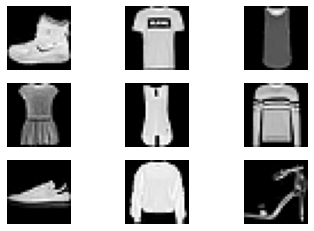

In [43]:
#Plotting the images in the 3*3 grid as requested:

for i in range(9):
    pyplot.subplot(3, 3, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(x_train[i])
pyplot.show()

## Section 2: Auto-Encoder

The auto-encoder is a special two part structure having an encoder and a decoder. In the model the input data will be passed through the encoder, which will reduce the dimension of the data and this compressed data will be passed through the decoder to produce the recosntructed output. This compressed data is called the bottleneck (z), thus the best encoder will reduce the dimension of teh data, without losing any important information of the data. 

Thus the Encoder will compress teh original data space into bottleneck space and the decoder will map from the bottlenec space to the origianl data spcae. 

### Part 1: Model Development

I have devloped the model in the snippet below. The original space of the data is that of the dimensions of the input image, whereas it will be passed through the encoder to be compressed. In the model defined, I have taken the input as 28*28. I have added the weights in the layers in the order 784, 392 and 64. 

In [27]:
#In the below section, I am developing the auto-encoder:
#I have developed it in two parts, I have first defined the encoder and then the decoder. 

#Encoder:
encoder_input = keras.Input(shape = (28,28,1), name = "img")
x = keras.layers.Flatten()(encoder_input)
encoder_1 = layers.Dense(784, activation='relu')(x)
encoder_2 = layers.Dense(392, activation='relu')(encoder_1)
encoder_3 = layers.Dense(64, activation='relu')(encoder_2)

#Defining the encoder:
encoder = keras.Model(encoder_input, encoder_3, name = "encoder")


#Decoder:
decoder_1 = layers.Dense(64, activation='relu')(encoder_3)
decoder_2 = layers.Dense(392, activation='relu')(decoder_1)
decoder_3= layers.Dense(784, activation='relu')(decoder_2)
decoder_output = keras.layers.Reshape((28,28,1))(decoder_3)

#Compiling the Auto-encoder model
autoencoder = keras.Model(encoder_input, decoder_output)
autoencoder.compile(optimizer='adam', loss='mse')

#Printing the summary of the defined autoencoder
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 784)               615440    
                                                                 
 dense_22 (Dense)            (None, 392)               307720    
                                                                 
 dense_23 (Dense)            (None, 64)                25152     
                                                                 
 dense_24 (Dense)            (None, 64)                4160      
                                                                 
 dense_25 (Dense)            (None, 392)               25480 

### Part 2: Data Preparation

I am normalizing the data before being fed into the Model for training. 

In [41]:
#Preparing the data for Auto-encoder input:

x_train_AE = x_train/255.0 
x_test_AE = x_test/255.0

### Part 3: Model fitting and prediction

I am fitting the autoencoder with the training data, keeping the epochs at 250 and batch size at 256. 

In [43]:
#Fitting the auto encoder

autoencoder.fit(x_train_AE, x_train_AE,
                epochs=250,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_AE, x_test_AE))

Epoch 1/250
235/235 [==============================] - 15s 50ms/step - loss: 0.0470 - val_loss: 0.0266
Epoch 2/250
235/235 [==============================] - 11s 45ms/step - loss: 0.0237 - val_loss: 0.0222
Epoch 3/250
235/235 [==============================] - 11s 48ms/step - loss: 0.0212 - val_loss: 0.0205
Epoch 4/250
235/235 [==============================] - 10s 43ms/step - loss: 0.0199 - val_loss: 0.0197
Epoch 5/250
235/235 [==============================] - 10s 43ms/step - loss: 0.0190 - val_loss: 0.0186
Epoch 6/250
235/235 [==============================] - 10s 42ms/step - loss: 0.0181 - val_loss: 0.0181
Epoch 7/250
235/235 [==============================] - 11s 45ms/step - loss: 0.0177 - val_loss: 0.0178
Epoch 8/250
235/235 [==============================] - 10s 44ms/step - loss: 0.0174 - val_loss: 0.0177
Epoch 9/250
235/235 [==============================] - 10s 42ms/step - loss: 0.0170 - val_loss: 0.0171
Epoch 10/250
235/235 [==============================] - 10s 44ms/step - l

### Part 4: Plotting Results

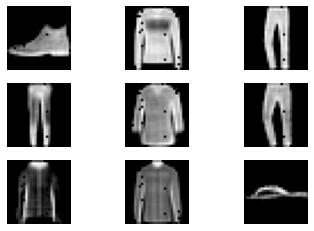

In [70]:
#I am printing the images predicted by the auto-encoder in this cell. 
#I am printing 9 images as requested in a 3*3 grid

for i in range(9):
    pyplot.subplot(3, 3, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    ae_out = autoencoder.predict([x_test_AE[i].reshape(-1,28,28,1)])[0]
    plt.imshow(ae_out, cmap = "gray")
pyplot.show()

## Section 3: Variational Auto-Encoder (VAE)

VAE is a modification of the AE deployed above. It can be represented as:

VAE = AE + Sampling + Kullback-Leibler regularisation

The essential difference in this case is that the encoder will be outputing the mean and standard deviation on which a sampling operation will be carried out. Thus each dimension in the latent space will be represented by the mean and sd. The sampling carried out will help the VAE achieve a smooth represenation. This will be fed into the Decoder as the input. 

The VAE trains its parametrs using two principla loss functions, reconstruction and regularization loss, this can help reduce the overfitting of data. We use the Kullback-Leibler (statistical measure to calculate difference between a pair of distributions)loss as the regularization term in the VAE loss. 

I have added the weights in the layers in the order 784, 392 and 64. 

### Part 1: Model Development

In [24]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K


original_dim = 28*28
intermediate_dim = 784
latent_dim = 98

class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        epsilon = tf.keras.backend.random_normal(shape=tf.shape(z_mean))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


# Define encoder model:
# input -> hidden layer -> (z_mean, z_log_var) -> (sampling) z
original_inputs = tf.keras.Input(shape=(original_dim,), name="encoder_input")
x = layers.Dense(intermediate_dim, activation="relu")(original_inputs)
x = layers.Dense(392, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()((z_mean, z_log_var))
encoder = tf.keras.Model(inputs=original_inputs, outputs=z, name="encoder")


# Define decoder model:
# z -> hidden layer -> output
latent_inputs = tf.keras.Input(shape=(latent_dim,), name="z_sampling")
x = layers.Dense(64, activation="relu")(latent_inputs)

x = layers.Dense(392, activation="relu")(latent_inputs)
x = layers.Dense(intermediate_dim, activation="relu")(x)
outputs = layers.Dense(original_dim, activation="relu")(x)
decoder = tf.keras.Model(inputs=latent_inputs, outputs=outputs, name="decoder")

#Defining the VAE Model
outputs = decoder(z)
vae = tf.keras.Model(inputs=original_inputs, outputs=outputs, name="vae")

#Defining the lossses of the model

#Defining the Reconstruction Loss
reconstruction_loss = mse(original_inputs, outputs)
reconstruction_loss = original_dim * K.mean(reconstruction_loss)
kl_loss = -0.5 * tf.reduce_mean(
    z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)

#Setting up the Kullback-Leibler(statistical measure to calculate difference between a pair of distributions)loss. 
vae.add_loss(kl_loss)
vae.add_metric(kl_loss, name='kl_loss', aggregation='mean')
vae.add_loss(reconstruction_loss)
vae.add_metric(reconstruction_loss, name='mse_loss', aggregation='mean')


#Printing the summary of the VAE
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 784)]        0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 784)          615440      ['encoder_input[0][0]']          
                                                                                                  
 dense_15 (Dense)               (None, 392)          307720      ['dense_14[0][0]']               
                                                                                                  
 dense_16 (Dense)               (None, 64)           25152       ['dense_15[0][0]']               
                                                                                                

### Part 2: Preparing the Data

In the following steps of the code, I am preparing the data to be fit into the VAE Model developed above. 

In [37]:
#Loading the data for training the VAE:
(x_train_VAE, y_train_VAE),(x_test_VAE, y_test_VAE) = tf.keras.datasets.fashion_mnist.load_data()

#Normalizing the data to be fed into the VAE:
x_train_VAE = x_train_VAE/255.0  
x_test_VAE = x_test_VAE/255.0 

#Reshaping the data to be fed into VAE
x_train_VAE =x_train_VAE.reshape(x_train_VAE.shape[0],784,1)
x_test_VAE =x_test_VAE.reshape(x_test_VAE.shape[0],784,1)

## Model Runs

I am setting different hyperparameters to run the model. I ahve run the model twice, with different sets of hyperparameters. I am listing the model runs below. 

### Model Run 1:

In this model run we are keeping the learning rate at 0.0001, epochs at 100 and batch_size of 32.

In [17]:
#Compiling the VAE:
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001)
vae.compile(optimizer)

#Training the VAE developed in the previous lines of code:
vae.fit(x_train_VAE, x_train_VAE,
        epochs=100,
        batch_size=32,
        validation_data=(x_test_VAE, x_test_VAE))

Epoch 1/100
1875/1875 [==============================] - 40s 21ms/step - loss: 12.4401 - kl_loss: 1.7870 - mse_loss: 10.6530 - val_loss: 12.2226 - val_kl_loss: 1.7775 - val_mse_loss: 10.4451
Epoch 2/100
1875/1875 [==============================] - 39s 21ms/step - loss: 11.8766 - kl_loss: 1.7595 - mse_loss: 10.1171 - val_loss: 11.7664 - val_kl_loss: 1.7660 - val_mse_loss: 10.0004
Epoch 3/100
1875/1875 [==============================] - 37s 20ms/step - loss: 11.4469 - kl_loss: 1.7308 - mse_loss: 9.7161 - val_loss: 11.2928 - val_kl_loss: 1.7335 - val_mse_loss: 9.5592
Epoch 4/100
1875/1875 [==============================] - 38s 21ms/step - loss: 11.0241 - kl_loss: 1.7018 - mse_loss: 9.3223 - val_loss: 11.0405 - val_kl_loss: 1.6781 - val_mse_loss: 9.3624
Epoch 5/100
1875/1875 [==============================] - 38s 20ms/step - loss: 10.7575 - kl_loss: 1.6702 - mse_loss: 9.0873 - val_loss: 10.7832 - val_kl_loss: 1.6588 - val_mse_loss: 9.1243
Epoch 6/100
1875/1875 [============================

### Part 3: Prediction

In the following lines of the code, I am making the prediction (image generation) using the trained model. 

In [18]:
#In this section of teh code, I am calling the encoder and decoder developed above, to get the predicted images:

#I am sending in the x_test_VAE into the encoder. This will be used to get the encoder output, encoded_images. 
#The encoder output will be fed into the decoder, which will be providing the reconstrcuted images. 

encoded_image = encoder.predict(x_test_VAE)
decoded_image = decoder.predict(encoded_image)

### Part 4: Plot

In the following section of the code, I am plotting the predictions made in the above lines of code. In the bewlo snippte, I ahve plotted the images as predicted by the Model Run 1. I have plotted the origianl 9 images against the 9 generated images. The top section of the images are the original ones, while the belwo line of images are the ones that have been generated by the VAE. 

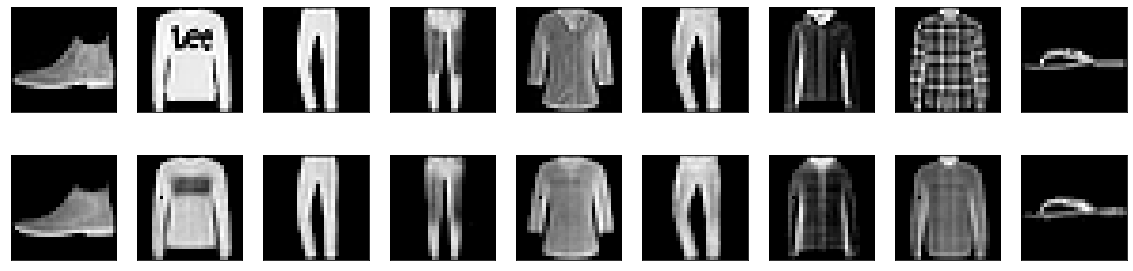

In [20]:
#Plotting the images that have been predicted in the previous section of the code:

#Setting how many images have to be plot:
n = 9

#Setting up the sixe of the figures and 
plt.figure(figsize=(20,5))
for i in range(n):
    #Plotting the original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_VAE[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Plotting the recosntructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Model Run 2:

In this model run we are keeping the learning rate at 0.00001, epochs at 100 and batch_size of 64.

In [21]:
#Compiling the VAE:
optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00001)
vae.compile(optimizer)

#Training the VAE developed in the previous lines of code:
vae.fit(x_train_VAE, x_train_VAE,
        epochs=250,
        batch_size=64,
        validation_data=(x_test_VAE, x_test_VAE))

Epoch 1/250
938/938 [==============================] - 15s 15ms/step - loss: 6.5145 - kl_loss: 1.0495 - mse_loss: 5.4650 - val_loss: 7.2431 - val_kl_loss: 1.0485 - val_mse_loss: 6.1946
Epoch 2/250
938/938 [==============================] - 14s 14ms/step - loss: 6.4916 - kl_loss: 1.0492 - mse_loss: 5.4424 - val_loss: 7.2341 - val_kl_loss: 1.0501 - val_mse_loss: 6.1840
Epoch 3/250
938/938 [==============================] - 13s 14ms/step - loss: 6.4858 - kl_loss: 1.0500 - mse_loss: 5.4359 - val_loss: 7.2325 - val_kl_loss: 1.0493 - val_mse_loss: 6.1832
Epoch 4/250
938/938 [==============================] - 15s 16ms/step - loss: 6.4805 - kl_loss: 1.0492 - mse_loss: 5.4313 - val_loss: 7.2336 - val_kl_loss: 1.0501 - val_mse_loss: 6.1835
Epoch 5/250
938/938 [==============================] - 15s 16ms/step - loss: 6.4785 - kl_loss: 1.0502 - mse_loss: 5.4282 - val_loss: 7.2327 - val_kl_loss: 1.0503 - val_mse_loss: 6.1824
Epoch 6/250
938/938 [==============================] - 15s 16ms/step - loss

### Part 3: Prediction

In the following lines of the code, I am making the prediction (image generation) using the trained model. 

In [22]:
#In this section of the code, I am calling the encoder and decoder developed above, to get the predicted images:

#I am sending in the x_test_VAE into the encoder. This will be used to get the encoder output, encoded_images. 
#The encoder output will be fed into the decoder, which will be providing the reconstrcuted images. 

encoded_image = encoder.predict(x_test_VAE)
decoded_image = decoder.predict(encoded_image)

### Part 4: Plot

In the following section of the code, I am plotting the predictions made in the above lines of code. I have plotted the origianl 9 images against the 9 generated images. The top section of the images are the original ones, while the belwo line of images are the ones that have been generated by the VAE. 

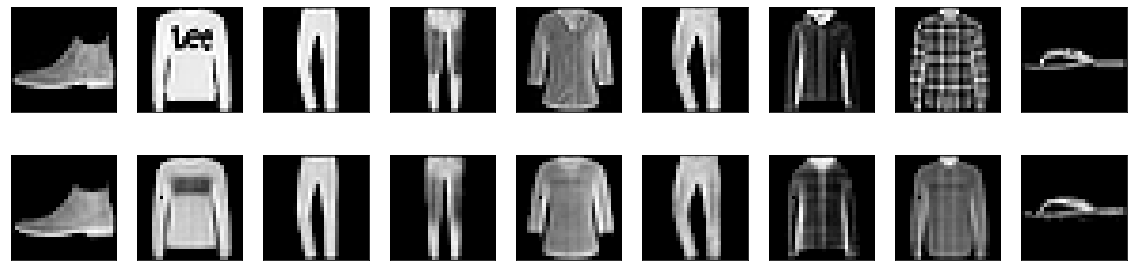

In [23]:
#Plotting the images that have been predicted in the previous section of the code:

#Setting how many images have to be plot:
n = 9

#Setting up the sixe of the figures and 
plt.figure(figsize=(20,5))
for i in range(n):
    #Plotting the original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_VAE[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Plotting the recosntructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_image[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Section 4: Generative Adverserial Network (GAN)

GANs are a framework for teaching a Deep Learning model to understand the distribution of the training data so that we can generate new data (image generation in this case) from that same distribution. They consist of two distinct models: a generator and a discriminator. The generator's job is to generate 'fake' images that resemble the training images. The discriminator's job is to examine an image and determine whether it is a genuine training image or a bogus image generated by the generator. During training, the generator is constantly trying to outwit the discriminator by creating better and better fakes, while the discriminator is working to improve as a detective and correctly classify the real and fake images. 

During training, the generator improves at creating realistic-looking images, while the discriminator improves at telling them apart. The ideal condition is when the discriminator can no longer distinguish between real and fake images. 

### Part 1: Model Development 

In the below lines of code, I have developed the Generator and Discriminator first. I have brought them all together by creating the GAN. I ahve then normalized the data between a range of [-1,1] and then fed it into the GAN during the training process. I am using a set of images of the size 28*28; this is why the shape of the input layer will be that of the latenet space (which as defined in this case is 98). The output of the Generator will be of 784 as that is the size of the image in this case. The activation of the Generator output must be tanh as the data must be represented within  arnge of [-1,1]. In a similar way the Discriminator is supposed to identify if the images are real or fake, so its inputs are that of the size of the image, whereas the output has an activation of sigmoid. Thus the Discriminator will essentially act as an image classifier, determining if the image is fake or real. Thus in the model the Generator will be trainable, but the Discriminator will not be trainable. 

I have added the weights in the layers in the order 784, 392 and 64. I have printed the model summaries of the Generator, Discriminator and GAN below.

In [6]:
#Developing the model

#Initializing the dimension of the latent space (z)
z_dim = 98

#Defining the Generator:
encoder_input = keras.Input(shape = (z_dim,), name = "Generator_Image")
encoder_1 = layers.Dense(64, activation='relu')(encoder_input)
encoder_2 = layers.Dense(392, activation='relu')(encoder_1)
encoder_3 = layers.Dense(784, activation='relu')(encoder_2)
Generator_output = layers.Dense(784, activation="tanh")(encoder_3)
Generator=Model(inputs = encoder_input, outputs = Generator_output, name="Generator")
Generator.summary()

# Define Discriminator
Discriminator_Input = keras.Input(shape = (784,), name = "Discriminator_Image")
Discriminator_1 = layers.Dense(392, activation="relu",name="Discriminator_1")(Discriminator_Input)
Discriminator_1=LeakyReLU(alpha=0.2)(Discriminator_1)
Discriminator_2 = layers.Dense(64, activation="relu",name="Discriminator_2")(Discriminator_1)
Discriminator_2=LeakyReLU(alpha=0.2)(Discriminator_2)
Discriminator_output = layers.Dense(1, activation="sigmoid")(Discriminator_2)
Discriminator=Model(inputs= Discriminator_Input, outputs=Discriminator_output,name="Discriminator")
Discriminator.summary()

#Compiling the Discriminator
Discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5),metrics=['accuracy'])

#Setting the Discriminator as non trainable. 
Discriminator.trainable = False
#I am setting up the input for the GAN
#I have defined the dimension of the latent space above, in the below lines I am setting up the input of the GAN

Discriminator.trainable = False
z = keras.Input(shape=(z_dim,))

#Generating the model of GAN
GAN = Model(z, Discriminator(Generator(z)))
#Compiling the GAN
GAN.compile(loss='binary_crossentropy', optimizer=adam_v2.Adam(0.001, 0.5),
          metrics=['accuracy'])

#Printing the summary of the GAN 
GAN.summary()

Model: "Generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Generator_Image (InputLayer  [(None, 98)]             0         
 )                                                               
                                                                 
 dense_5 (Dense)             (None, 64)                6336      
                                                                 
 dense_6 (Dense)             (None, 392)               25480     
                                                                 
 dense_7 (Dense)             (None, 784)               308112    
                                                                 
 dense_8 (Dense)             (None, 784)               615440    
                                                                 
Total params: 955,368
Trainable params: 955,368
Non-trainable params: 0
___________________________________________________

### Part 2: Preparing the Data

In the GAN, described above, I have set the output of the Generator with an activation function of tanh. This makes it necesary to normalize the data that will be fed into the GAN. I am normalizing the input data between a range of [-1, 1] for the GAN in the below lines of code. 

In [3]:
#Loading the data and setting the parameters for the model run. 

#Loading the data from the mnist fashion using load_data()
(x_train, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

#I am normalizing teh data, by mapping it between a range of [-1, 1]. 
#As we are using tanh (as output of Generator), we have to normalize the data. 

x_train = x_train / 127.5 - 1.
x_train = x_train.reshape(x_train.shape[0], 28 * 28)

## Model Run 1:

I am using the floor division to calculate the number of steps required. 
Setting the hyperparameters for the Model run 1:
batch_size=1000; epochs = 100; Number of Steps: 6000. 

In [7]:
#Setting the necessary parameters. 
batch_size=1000
epochs = 100
steps = epochs * x_train.shape[0] // batch_size
sample_interval=100

### Part 3: Generating Images

In [4]:
#Training of the GAN

#In the code below, I am assigning 1 to fake images and 0 to real images. 
#Fake Images: 1
#REal Images: 0
y_fake = np.ones((batch_size, 1))
y_real = np.zeros((batch_size, 1))


#In the fucntion below, I have sampled the images. 
def sample_images(epoch):
    #saving an image. 
    r, c = 5, 5
    z = np.random.normal(0, 1, (r * c, z_dim))
    x_fake = Generator.predict(z)

    fig, axs = plt.subplots(r, c)
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(x_fake[i*r+j].reshape((28, 28)), cmap='gray')
            axs[i, j].axis('off')
    print("saving")
    plt.tight_layout()
    plt.savefig("GAN_Fashion_Mnist.png")
    plt.close()
    

#In the below code, I am iterating through the steps as generated above. 
print("*****GAN Run starting*****\n")
for step in range(steps):

    #choosing real images (x_real) and make fake images (x_fake)
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    x_real = x_train[idx]
    z = np.random.normal(0, 1, (batch_size, z_dim))
    x_fake = Generator.predict(z)

    #In the below section, I am training the Discriminator
    loss_d_real = Discriminator.train_on_batch(x_real, y_real)
    loss_d_fake = Discriminator.train_on_batch(x_fake, y_fake)
    loss_d = 0.5 * np.add(loss_d_real, loss_d_fake)

    # In the below section, I am training the Generator
    #Sending the images
    loss_g = GAN.train_on_batch(z, y_real)
    

    print(f"{step:4d}/{steps} [D {loss_d[0]:.2f}, acc. (on x_real and x_fake) {100 * loss_d[1]:3.0f}] [G {loss_g[0]:.2f}, acc. (on x_fake) {100 * loss_g[1]:3.0f}]")
    if step % sample_interval == 0 or step == steps - 1:
        sample_images(step)

*****GAN Run starting*****

   0/6000 [D 0.65, acc. (on x_real and x_fake)  51] [G 0.70, acc. (on x_fake)  48]
saving
   1/6000 [D 0.84, acc. (on x_real and x_fake)  50] [G 0.31, acc. (on x_fake) 100]
   2/6000 [D 1.39, acc. (on x_real and x_fake)  50] [G 0.11, acc. (on x_fake) 100]
   3/6000 [D 1.96, acc. (on x_real and x_fake)  50] [G 0.04, acc. (on x_fake) 100]
   4/6000 [D 2.32, acc. (on x_real and x_fake)  50] [G 0.02, acc. (on x_fake) 100]
   5/6000 [D 2.41, acc. (on x_real and x_fake)  50] [G 0.02, acc. (on x_fake) 100]
   6/6000 [D 2.29, acc. (on x_real and x_fake)  50] [G 0.03, acc. (on x_fake) 100]
   7/6000 [D 2.14, acc. (on x_real and x_fake)  50] [G 0.05, acc. (on x_fake) 100]
   8/6000 [D 2.05, acc. (on x_real and x_fake)  50] [G 0.06, acc. (on x_fake) 100]
   9/6000 [D 1.96, acc. (on x_real and x_fake)  50] [G 0.08, acc. (on x_fake) 100]
  10/6000 [D 1.95, acc. (on x_real and x_fake)  50] [G 0.08, acc. (on x_fake) 100]
  11/6000 [D 1.92, acc. (on x_real and x_fake)  50] 

### Part 4: Plot

I am plotting the genarted image in the below code snippet. I am displaying the image in a larger size as otherwise it was difficult to understand the generated images. I initially generated 3X3 images, but most of them were not being rendered properly, so I expanded it to 5X5. I am saving 25 images generated by GAN and storing it in the file, GAN_Fashion_Mnist.png, in the above lines of code. I will be displaying the aved image in the belwo lines of code. 

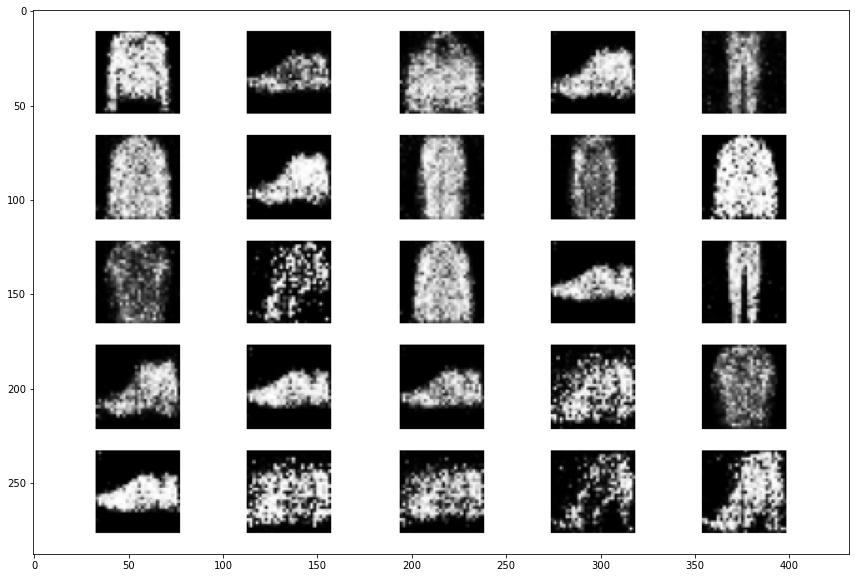

In [5]:
#Plotting the generated images. 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.figure(figsize=(30, 10))
image_mp= mpimg.imread(r'C:\Users\mit_b\Deep Learning Assignment 2\GAN_Fashion_Mnist.png')
imgplot=plt.imshow(image_mp)
plt.show()

## Model Run 2:

I am using the floor division to calculate the number of steps required. 
Setting the hyperparameters for the Model run 1:
batch_size = 1000; epochs = 250; Number of Steps: 15000

In [9]:
#Setting the necessary parameters. 
batch_size=1000
epochs = 250
steps = epochs * x_train.shape[0] // batch_size
sample_interval=100

### Part 3: Generating Images

In [10]:
#Training of the GAN

#In the code below, I am assigning 1 to fake images and 0 to real images. 
#Fake Images: 1
#REal Images: 0
y_fake = np.ones((batch_size, 1))
y_real = np.zeros((batch_size, 1))


#In the fucntion below, I have sampled the images. 
def sample_images(epoch):
    #saving an image. 
    r, c = 5, 5
    z = np.random.normal(0, 1, (r * c, z_dim))
    x_fake = Generator.predict(z)

    fig, axs = plt.subplots(r, c)
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(x_fake[i*r+j].reshape((28, 28)), cmap='gray')
            axs[i, j].axis('off')
    print("saving")
    plt.tight_layout()
    plt.savefig("GAN_Fashion_Mnist_2.png")
    plt.close()
    

#In the below code, I am iterating through the steps as generated above. 
print("*****GAN Run starting*****\n")
for step in range(steps):

    #choosing real images (x_real) and make fake images (x_fake)
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    x_real = x_train[idx]
    z = np.random.normal(0, 1, (batch_size, z_dim))
    x_fake = Generator.predict(z)

    #In the below section, I am training the Discriminator
    loss_d_real = Discriminator.train_on_batch(x_real, y_real)
    loss_d_fake = Discriminator.train_on_batch(x_fake, y_fake)
    loss_d = 0.5 * np.add(loss_d_real, loss_d_fake)

    # In the below section, I am training the Generator
    #Sending the images
    loss_g = GAN.train_on_batch(z, y_real)
    

    print(f"{step:4d}/{steps} [D {loss_d[0]:.2f}, acc. (on x_real and x_fake) {100 * loss_d[1]:3.0f}] [G {loss_g[0]:.2f}, acc. (on x_fake) {100 * loss_g[1]:3.0f}]")
    if step % sample_interval == 0 or step == steps - 1:
        sample_images(step)

*****GAN Run starting*****

   0/15000 [D 0.80, acc. (on x_real and x_fake)  58] [G 0.84, acc. (on x_fake)   0]
saving
   1/15000 [D 0.73, acc. (on x_real and x_fake)  41] [G 0.50, acc. (on x_fake) 100]
   2/15000 [D 0.90, acc. (on x_real and x_fake)  49] [G 0.28, acc. (on x_fake) 100]
   3/15000 [D 1.26, acc. (on x_real and x_fake)  50] [G 0.14, acc. (on x_fake) 100]
   4/15000 [D 1.60, acc. (on x_real and x_fake)  50] [G 0.08, acc. (on x_fake) 100]
   5/15000 [D 1.79, acc. (on x_real and x_fake)  50] [G 0.06, acc. (on x_fake) 100]
   6/15000 [D 1.86, acc. (on x_real and x_fake)  50] [G 0.06, acc. (on x_fake) 100]
   7/15000 [D 1.81, acc. (on x_real and x_fake)  50] [G 0.08, acc. (on x_fake) 100]
   8/15000 [D 1.72, acc. (on x_real and x_fake)  50] [G 0.10, acc. (on x_fake) 100]
   9/15000 [D 1.68, acc. (on x_real and x_fake)  50] [G 0.11, acc. (on x_fake) 100]
  10/15000 [D 1.61, acc. (on x_real and x_fake)  50] [G 0.14, acc. (on x_fake) 100]
  11/15000 [D 1.50, acc. (on x_real and x

## Plot 

I am plotting the 25 images generated by the Second run of the GAN Model. 

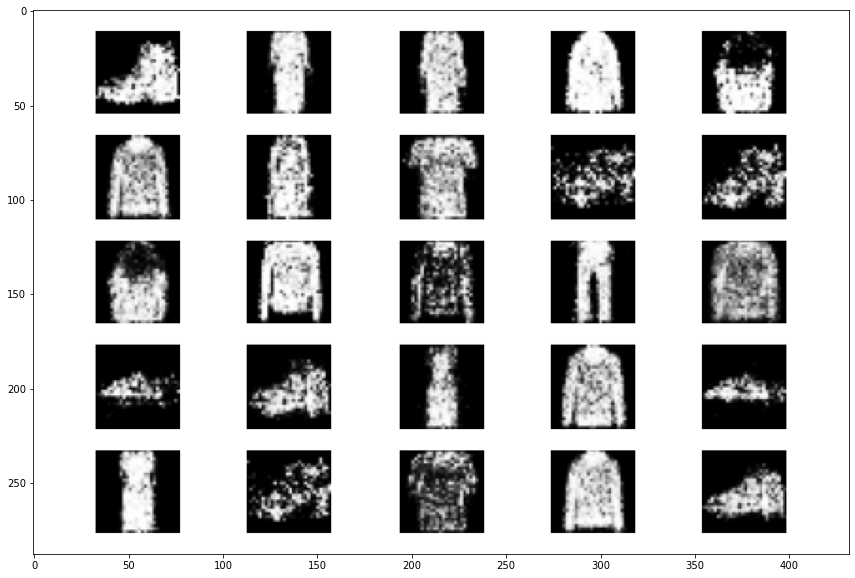

In [11]:
#Plotting the generated images. 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.figure(figsize=(30, 10))
image_mp= mpimg.imread(r'C:\Users\mit_b\Deep Learning Assignment 2\GAN_Fashion_Mnist_2.png')
imgplot=plt.imshow(image_mp)
plt.show()

# Section 5: Discussion of Results

### Results

I have run the 3 models AE, VAE and GAN in the above sections of my code. Of all the results of the models, the AE and The VAE seem to have better generated the images when compared to the images generated by the GAN. I have run two models of the VAE by tuning the hyperparameters like learning rate and number of epochs. I have used the Fashion MNIST Dataset for the Project, so the images are all in greyscale, discernable from each other by the shapes, border and structures. The data being fed into the models are of the shape 28*28. 

I am detailing the results in the sections below:

* Auto-Encoder (AE): 

    The results of the auto-encoder are quite good at the following hyperparamters: epochs = 250; batch size = 256 and adam    optimizer. I had run the AE with 100 epochs initially, but the image reconstruction was not as good. On increasing the number of epochs the results seemed to be better. The validation loss also had a steday decline, initially starting at 0.02, but after 250 epochs the validation loss reduced significantly to 0.01. The validation loss kept constant after 200 epochs and did not show any significant decline. 
    
    
* Variational Auto Encoder (VAE): 

    I have run the VAE model twice using different sets of paramters:
    
    * 1) Run 1:learning rate at 0.0001, epochs at 100 and batch_size of 32. The validation loss at start was ranging around 12.2, while after 100 epochs the validation loss came down to around 7.4. The images reconstructed after about 100 epochs, was quite decent, but the borders and specifications of the images were not very pronounced. 
    * 2) Run 2: learning rate at 0.00001, epochs at 100 and batch_size of 64. The validation loss with this model run started at around 7.4, but even after running for 250 epochs the validation loss did not show a significant decline. The images geenrated by this run of the model was marginally better than the ones produced by the first model run, but the differences were not very pronounced. 
    
    
* Generative Adverserial Network (GAN): 
    
    I have run the GAN twice with multiple hyperparameters. I have listed the results below:

    * 1)Run 1: The number of epochs in this run is dependent on the size of the training set. As the MNIST Fashion tarining set had around 60,000 images; I set the batch size at 1000, epochs at 100, which means the number of iterations for the training process would be around 6000. I ran the model with quite a few settings, finding this setting to be the best in creating the most discernable image. The accuracy on the  fake images does not show a significant rise, even after running it for nealry 6000 steps. 
    * 2) Run 2: I am setting the epochs at 250, with 60,000 training images, and a batch size of 1000. This would set the number of steps at 15,000. The performance of the GAN is better in this run, when compared to the first run of the model, even then the images that have been generated are not very good.  
    
    
All the models are generating images which have discernable borders and structures. All the images that have been generated can be isolated and identified independently. From the results of the models, it can be said that the AE and VAE (Model run 2: learning rate at 0.0001, epochs at 100 and batch_size of 64) seem to give the best image generation, whereas the images generated by the GAN (both Model 1 and 2) seem to be not performing as well. The images generated by the second model run of the GAN is better compared to the first one. So, improving the number of epochs might further improve the images being generated. 

### Possible Improvements

I have developed the AE, VAE and GAN in the Notebook, but I have not made a DC (Deep COnvoloution) GAN. In the GAN that I have developed, I have only used the Dense layers and have not used any Convolutional layers. It might be possible to improve the performance of the GAN, by adding BatchNormalization layers to the existing model. It might also be possible to change the ADAM Optimizer to RMSProp. This would make the GAN into a DCGAN, which might be able to give better results of image generation. 

# References

1) NUIG, CT5133: Deep Learning Lectures by James McDermott

2) [DCGAN Tutorial Keras](https://www.tensorflow.org/tutorials/generative/dcgan)

3) [Keras Optimizers](https://keras.io/api/optimizers/)

4) [Layer Activation Fucntions](https://keras.io/api/layers/activations/)

5) [Conv2D Layer Keras](https://keras.io/api/layers/convolution_layers/convolution2d/)

6) [Keras Sequential Model](https://keras.io/guides/sequential_model/)

7) [Keras Activation Functions](https://keras.io/api/layers/activations/)

8) [Keras MaxPooling Layer](https://keras.io/api/layers/pooling_layers/max_pooling2d/)

9) [Developing GAN Machine Learning Mastery](https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-a-cifar-10-small-object-photographs-from-scratch/)

10) [Deep Learning Datasets](https://www.analyticsvidhya.com/blog/2018/03/comprehensive-collection-deep-learning-datasets/)